# 2.4 Supervised Learning - Classification Models

## Model Training and Evaluation Steps

### 1. Data Splitting
- Split the dataset into **training set (80%)** and **testing set (20%)** using `train_test_split`.

### 2. Model Training
Train the following machine learning models on the training data:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**

### 3. Model Evaluation
Evaluate the performance of each model using the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **ROC Curve and AUC Score**

---

### ✅ Deliverables
- Trained models  
- Performance metrics for each model  
- ROC Curve visualization comparing all models  


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler



In [17]:
df = pd.read_csv("../datasets/final_data.csv")
df.head(10)

,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,145.0,233.0,150.0,0,2.3,3,0,6,0
1,67.0,4,160.0,286.0,108.0,1,1.5,2,3,3,1
2,67.0,4,120.0,229.0,129.0,1,2.6,2,2,7,1
3,37.0,3,130.0,250.0,187.0,0,3.5,3,0,3,0
4,41.0,2,130.0,204.0,172.0,0,1.4,1,0,3,0
5,56.0,2,120.0,236.0,178.0,0,0.8,1,0,3,0
6,62.0,4,140.0,268.0,160.0,0,3.6,3,2,3,1
7,57.0,4,120.0,354.0,163.0,1,0.6,1,0,3,0
8,63.0,4,130.0,254.0,147.0,0,1.4,2,1,7,1
9,53.0,4,140.0,203.0,155.0,1,3.1,3,0,7,1


In [18]:
numeric_cols = ['Age', 'Resting Blood Pressure', 'Cholesterol Level', 'Maximum Heart Rate Achieved', 'ST Depression']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(10)


,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,0.948726,1,0.977501,-0.233975,0.005455,0,1.278089,3,0,6,0
1,1.392002,4,1.965435,0.953947,-1.870760,1,0.508378,2,3,3,1
2,1.392002,4,-0.669057,-0.323629,-0.932652,1,1.566730,2,2,7,1
3,-1.932564,3,-0.010434,0.147057,1.658311,0,2.432655,3,0,3,0
4,-1.489288,2,-0.010434,-0.883970,0.988234,0,0.412164,1,0,3,0
5,0.172994,2,-0.669057,-0.166734,1.256265,0,-0.165120,1,0,3,0
6,0.837908,4,0.648189,0.550502,0.452173,0,2.528869,3,2,3,1
7,0.283813,4,-0.669057,2.478074,0.586188,1,-0.357547,1,0,3,0
8,0.948726,4,-0.010434,0.236712,-0.128560,0,0.412164,2,1,7,1
9,-0.159462,4,0.648189,-0.906383,0.228814,1,2.047800,3,0,7,1


### 1. Data Splitting
- Split the dataset into **training set (80%)** and **testing set (20%)** using `train_test_split`.


In [20]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("x Dataset shape:", X.shape)
print("y Dataset shape:", y.shape)
print("X_train Dataset shape:", X_train.shape)
print("y_train Dataset shape:", y_train.shape)
print("X_test Dataset shape:", X_test.shape)
print("y_test Dataset shape:", y_test.shape)

x Dataset shape: (303, 10)
y Dataset shape: (303,)
X_train Dataset shape: (242, 10)
y_train Dataset shape: (242,)
X_test Dataset shape: (61, 10)
y_test Dataset shape: (61,)


### 2. Model Training
Train the following machine learning models on the training data:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**

### 3. Model Evaluation
Evaluate the performance of each model using the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **ROC Curve and AUC Score**


---
## 1. LogisticRegression
---

Logistic Regression:
Test Accuracy: 0.8525
Training Accuracy: 0.8512

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



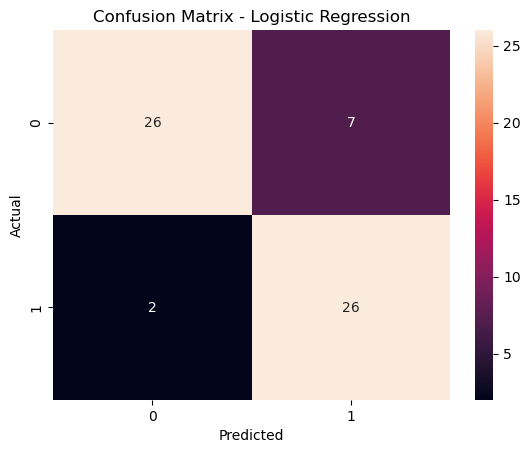

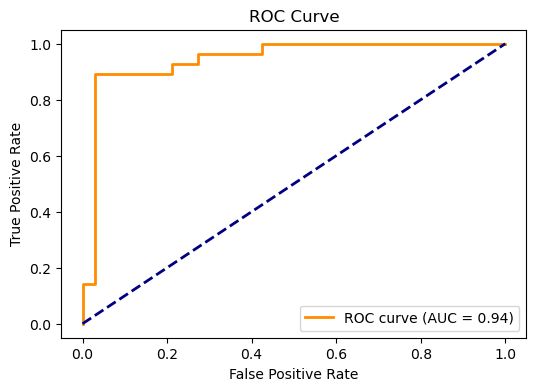


Cross-Validation Accuracy Scores: [0.89795918 0.7755102  0.77083333 0.77083333 0.79166667]
Mean CV Accuracy: 0.8014 ± 0.0489

Overfitting Check:
Training Accuracy: 0.8512
Test Accuracy: 0.8525
Mean CV Accuracy: 0.8014

✅ No major Overfitting detected based on accuracy comparison.


In [22]:
from sklearn.linear_model import LogisticRegression

# --------------------
# create the model
# --------------------
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# --------------------
# training the model & predicted
# --------------------
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# --------------------
# evaluate the model
# --------------------
print("Logistic Regression:")

# Accuracy on Test Data
test_acc = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy: {test_acc:.4f}")

# Accuracy on Train Data
train_acc = lr_model.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# --------------------
# plot confusion matrix
# --------------------
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --------------------
# ROC curve and AUC (for Binary Classification)
# --------------------
if len(np.unique(y_test)) == 2:
    y_proba = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# --------------------
# Cross-Validation
# --------------------
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --------------------
# Check for Overfitting
# --------------------
print("\nOverfitting Check:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

if train_acc - test_acc > 0.1:
    print("\n⚠️ Warning: Potential Overfitting Detected! Significant gap between Train and Test accuracy.")
else:
    print("\n✅ No major Overfitting detected based on accuracy comparison.")


### 🔵 ROC Curve - Quick Explanation

- **ROC Curve**: A graph used to evaluate the performance of binary classification models.
- **X-axis (False Positive Rate - FPR)**: The proportion of negative cases that the model incorrectly classified as positive.
- **Y-axis (True Positive Rate - TPR / Recall)**: The proportion of positive cases that the model correctly identified.
- **The diagonal blue dashed line**: Represents random guessing. If the model's performance was purely random, the curve would follow this line.
- **The orange curve**: Represents the actual performance of the model. The closer the curve is to the top-left corner, the better the model.

---

### 🔶 AUC (Area Under Curve)

- **AUC = 1.0**: Perfect model.
- **AUC = 0.5**: Random model.
- **AUC = 0.94 in this plot → Excellent performance.**  
  The model has a strong ability to distinguish between the two classes.


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


---
## 2. DecisionTreeClassifier
---

Decision Tree Resulte:
Test Accuracy: 0.7869
Training Accuracy: 0.9091

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.78      0.75      0.76        28

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



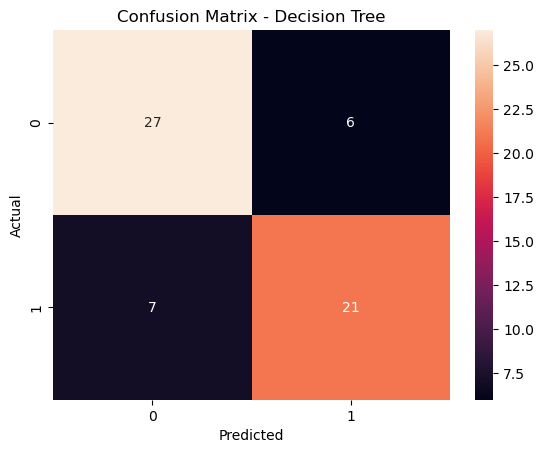

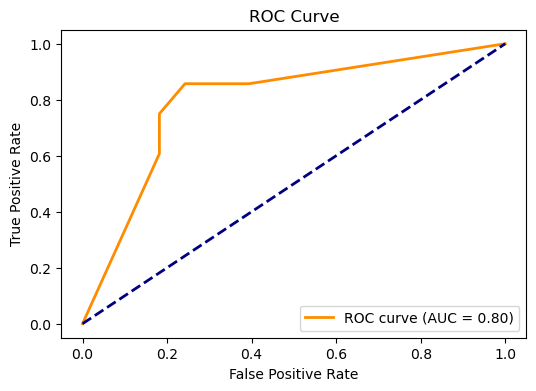

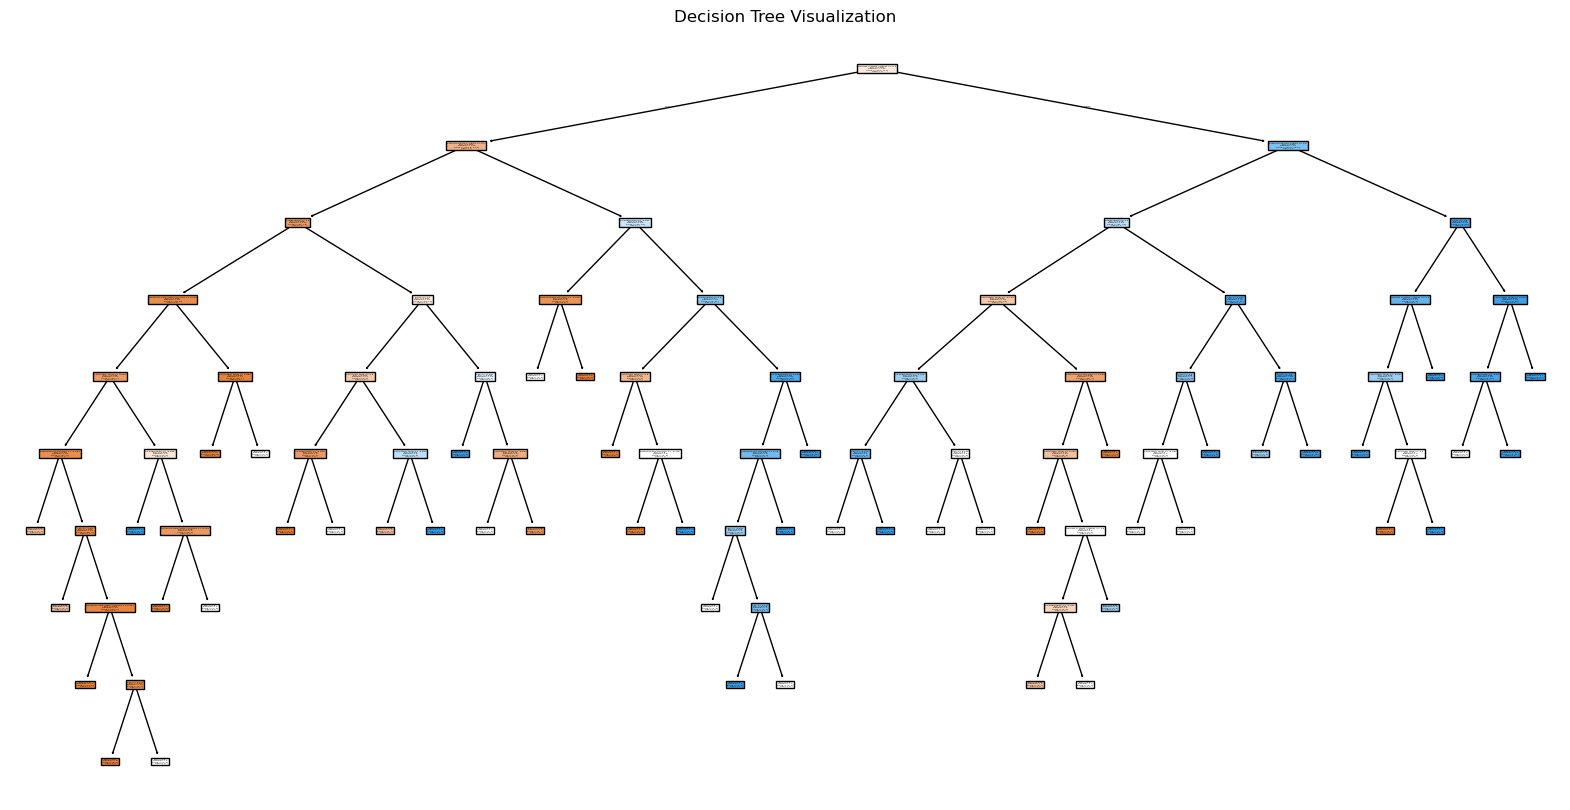

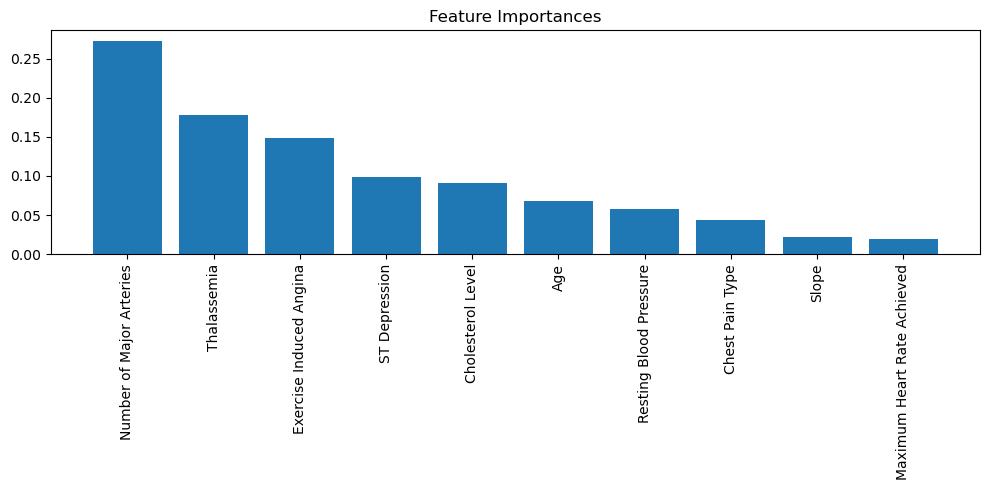


Cross-Validation Accuracy Scores: [0.7755102  0.69387755 0.75       0.70833333 0.8125    ]
Mean CV Accuracy: 0.7480 ± 0.0434

Overfitting Check:
Training Accuracy: 0.9091
Test Accuracy: 0.7869
Mean CV Accuracy: 0.7480

⚠️ Warning: Potential Overfitting Detected! Significant gap between Train and Test accuracy.


In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# --------------------
# create the model
# --------------------
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2
)

# --------------------
# training the model & predicted
# --------------------
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# --------------------
# evaluate the model
# --------------------
print("Decision Tree Resulte:")

# Accuracy on Test Data
test_acc = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_acc:.4f}")

# Accuracy on Train Data
train_acc = dt_model.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# --------------------
# plot confusion matrix
# --------------------
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --------------------
# ROC curve and AUC (for Binary Classification)
# --------------------
if len(np.unique(y_test)) == 2:
    y_proba = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# --------------------
# plot the decision tree
# --------------------
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.title("Decision Tree Visualization")
plt.show()

# --------------------
# Plot feature importances
# --------------------
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[indices])
plt.title("Feature Importances")
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# --------------------
# Cross-Validation
# --------------------
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# --------------------
# Check for Overfitting
# --------------------
print("\nOverfitting Check:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

if train_acc - test_acc > 0.1:
    print("\n⚠️ Warning: Potential Overfitting Detected! Significant gap between Train and Test accuracy.")
else:
    print("\n✅ No major Overfitting detected based on accuracy comparison.")


# Comparison of Decision Tree and Logistic Regression Performance (Accuracy & ROC Curve)


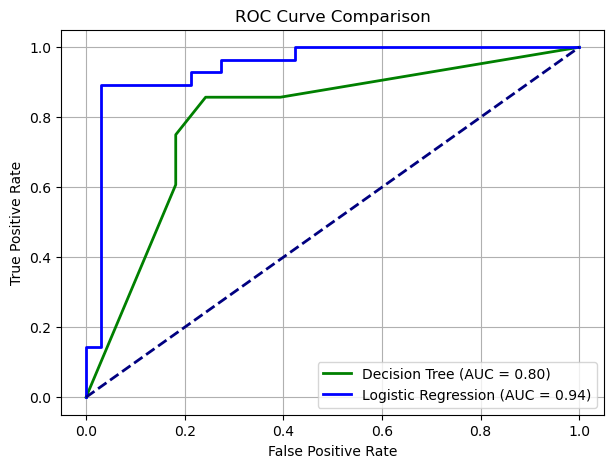


Model Comparison Results:
Decision Tree - Accuracy: 0.7869, AUC: 0.7965
Logistic Regression - Accuracy: 0.8525, AUC: 0.9448


In [31]:
# --------------------
# Accuracy Calculation for Both Models
# --------------------
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

y_pred_lr = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)


# --------------------
# ROC Curve & AUC Comparison (if binary classification)
# --------------------
if len(np.unique(y_test)) == 2:
    
    # Decision Tree
    dt_proba = dt_model.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
    auc_dt = auc(fpr_dt, tpr_dt)
    
    # Logistic Regression
    lr_proba = lr_model.predict_proba(X_test)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
    auc_lr = auc(fpr_lr, tpr_lr)
    
    # Plot ROC Curves
    plt.figure(figsize=(7, 5))
    plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # --------------------
    # Print Comparison Results
    # --------------------
    print("\nModel Comparison Results:")
    print(f"Decision Tree - Accuracy: {dt_acc:.4f}, AUC: {auc_dt:.4f}")
    print(f"Logistic Regression - Accuracy: {lr_acc:.4f}, AUC: {auc_lr:.4f}")

else:
    print("\nROC Curve not available - Target is not binary.")
    print(f"Decision Tree - Accuracy: {dt_acc:.4f}")
    print(f"Logistic Regression - Accuracy: {lr_acc:.4f}")



---
## 3. RandomForestClassifier
---

Random Forest Resulte:
Test Accuracy: 0.9016
Training Accuracy: 0.8760

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



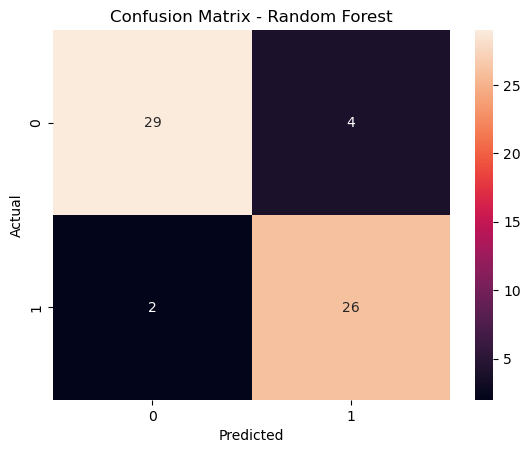

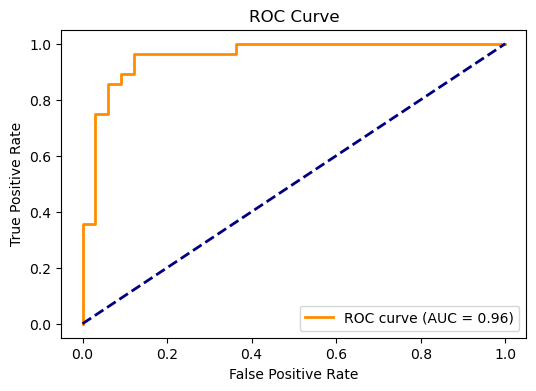

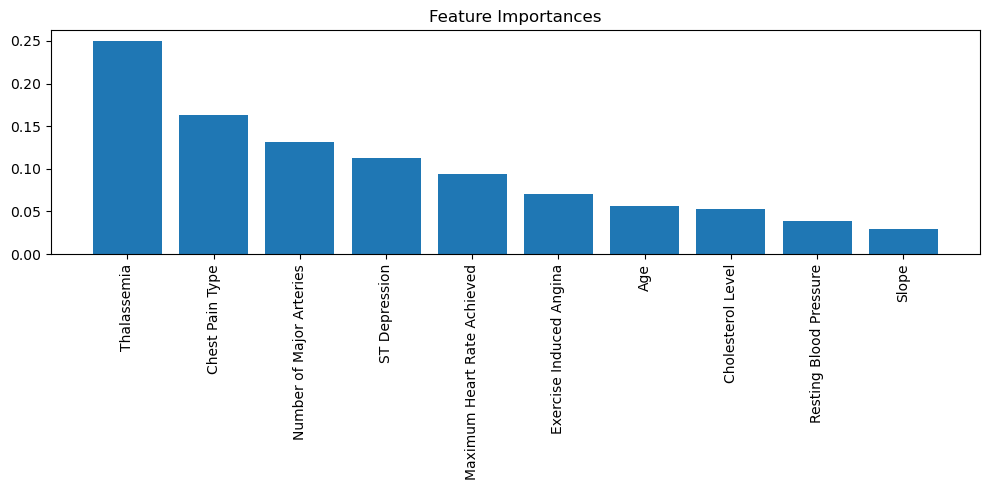


Cross-Validation Accuracy Scores: [0.89795918 0.75510204 0.8125     0.75       0.79166667]
Mean CV Accuracy: 0.8014 ± 0.0535

Overfitting Check:
Training Accuracy: 0.8760
Test Accuracy: 0.9016
Mean CV Accuracy: 0.8014

✅ No major Overfitting detected based on accuracy comparison.


In [51]:
from sklearn.ensemble import RandomForestClassifier

# --------------------
# create the model
# --------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=5
)

# --------------------
# training the model & predicted
# --------------------
rf_model.fit(X_train, y_train)
y_pred_dt = rf_model.predict(X_test)

# --------------------
# evaluate the model
# --------------------
print("Random Forest Resulte:")

# Accuracy on Test Data
test_acc = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_acc:.4f}")

# Accuracy on Train Data
train_acc = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# --------------------
# plot confusion matrix
# --------------------
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --------------------
# ROC curve and AUC (for Binary Classification)
# --------------------
if len(np.unique(y_test)) == 2:
    y_proba = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# --------------------
# Plot feature importances
# --------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[indices])
plt.title("Feature Importances")
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# --------------------
# Cross-Validation
# --------------------
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# --------------------
# Check for Overfitting
# --------------------
print("\nOverfitting Check:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

if train_acc - test_acc > 0.1:
    print("\n⚠️ Warning: Potential Overfitting Detected! Significant gap between Train and Test accuracy.")
else:
    print("\n✅ No major Overfitting detected based on accuracy comparison.")


---
## 4. SVC
---

SVM Resulte:
Test Accuracy: 0.8361
Training Accuracy: 0.8347

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



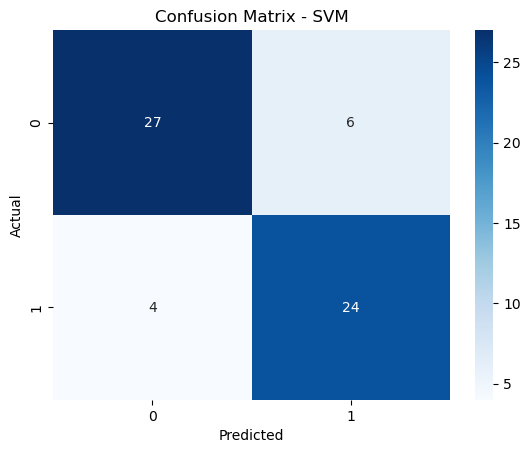

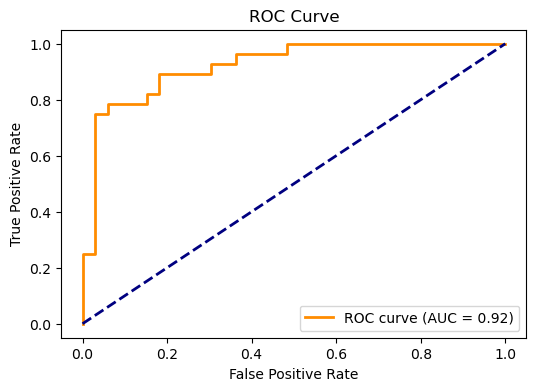

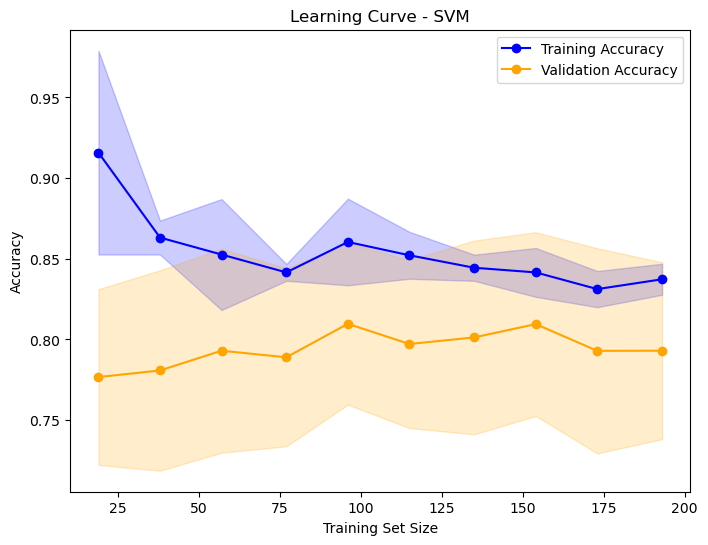


Cross-Validation Accuracy Scores: [0.89795918 0.7755102  0.79166667 0.75       0.75      ]
Mean CV Accuracy: 0.7930 ± 0.0548

Overfitting Check:
Training Accuracy: 0.8347
Test Accuracy: 0.8361
Mean CV Accuracy: 0.7930

✅ No major Overfitting detected based on accuracy comparison.


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# --------------------
# create the model
# --------------------
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# --------------------
# training the model & predicted
# --------------------
svm_model.fit(X_train, y_train)
y_pred_dt = svm_model.predict(X_test)

# --------------------
# evaluate the model
# --------------------
print("SVM Resulte:")

# Accuracy on Test Data
test_acc = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_acc:.4f}")

# Accuracy on Train Data
train_acc = svm_model.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# --------------------
# plot confusion matrix
# --------------------
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --------------------
# ROC curve and AUC (for Binary Classification)
# --------------------
if len(np.unique(y_test)) == 2:
    y_proba = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()


# --------------------
# Learning Curve
# --------------------
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculating the average and the standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plotting
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

plt.title('Learning Curve - SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


# --------------------
# Cross-Validation
# --------------------
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# --------------------
# Check for Overfitting
# --------------------
print("\nOverfitting Check:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

if train_acc - test_acc > 0.1:
    print("\n⚠️ Warning: Potential Overfitting Detected! Significant gap between Train and Test accuracy.")
else:
    print("\n✅ No major Overfitting detected based on accuracy comparison.")



## Validation Curve for `C` Parameter in SVM

### Purpose:
- Shows how changing `C` affects both training and validation performance.
- Helps detect:
  - **Underfitting** → Model is too simple.
  - **Overfitting** → Model memorizes training data.
  - Optimal `C` → Good generalization.

### How It Works:
- Try different values for `C` on a logarithmic scale (e.g., 0.001 → 1000).
- Perform Cross-Validation for each `C` value.
- Plot:
  - **Training Accuracy**
  - **Validation Accuracy**

### Interpretation:
| Situation                                     | Meaning                                |
|-----------------------------------------------|----------------------------------------|
| Both training and validation accuracy are low | **Underfitting** - Model is too simple |
| High training accuracy, low validation accuracy | **Overfitting** - Model memorizes data |
| Training and validation accuracy both high    | Optimal `C`, good generalization       |

---

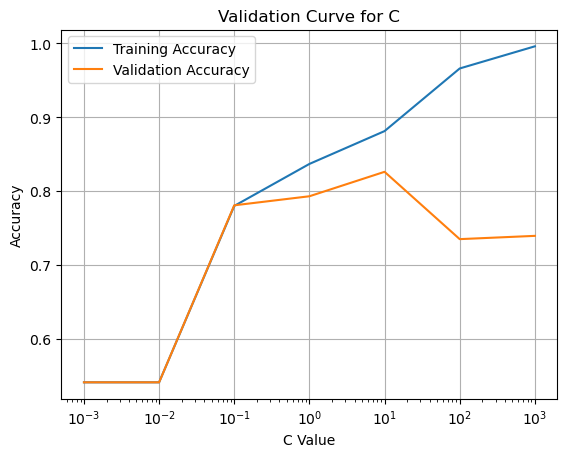

In [40]:
# --------------------
# Validation Curve for C
# --------------------
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', probability=True, random_state=42),
    X_train, y_train,
    param_name='C', param_range=param_range, cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.semilogx(param_range, train_mean, label='Training Accuracy')
plt.semilogx(param_range, test_mean, label='Validation Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Validation Curve for C')
plt.legend()
plt.grid()
plt.show()


## 📊 Validation Curve Analysis for `C` Parameter (SVM)

### Purpose:
The validation curve helps visualize how changing the hyperparameter `C` affects model performance on both training and validation sets.

---

### ✅ Observations:

- **X-axis:** `C` value (logarithmic scale).
- **Y-axis:** Model accuracy.

#### 1. Training Accuracy (Blue Curve):
- At very small `C` values (e.g., 0.001), accuracy is low → clear **Underfitting**.
- As `C` increases, training accuracy improves.
- At very large `C` values (e.g., 100, 1000), training accuracy reaches almost **100%**, indicating potential **Overfitting**.

#### 2. Validation Accuracy (Orange Curve):
- At small `C` values, validation accuracy is low → **Underfitting**.
- Validation accuracy improves as `C` increases, reaching a peak around `C ≈ 1`.
- Beyond `C ≈ 1`, validation accuracy starts to decrease → clear sign of **Overfitting**.

---

### ✅ Conclusion:

| C Value Range         | Interpretation              |
|-----------------------|-----------------------------|
| Very small (≈ 0.001)  | Underfitting, poor model    |
| Around 1              | Best balance, good accuracy |
| Large values (100+)   | Overfitting risk, low generalization |

**Suggested Optimal C:** Around **1**, based on the curve.

---

### Final Notes:
- A good `C` balances model complexity and generalization.
- Extremely small or large `C` values can degrade performance.
- Always confirm with additional metrics like ROC Curve, Cross-Validation, etc.


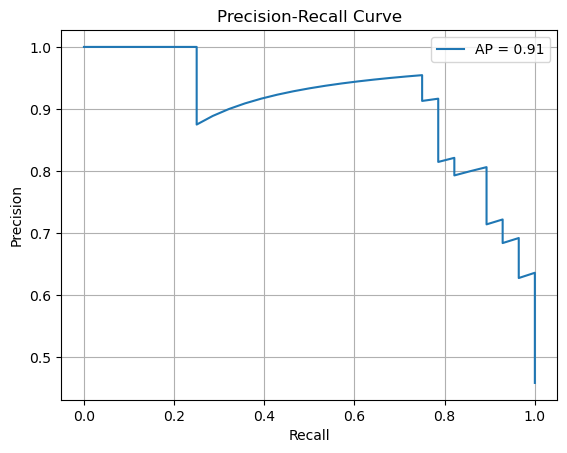

In [41]:
# --------------------
# Precision-Recall Curve
# --------------------

from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = svm_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


## Notes: Understanding Precision-Recall Curve with Balanced Data

- Since the dataset is **balanced**, the **ROC Curve and AUC** are the main indicators to evaluate model performance.
- The **Precision-Recall Curve (PR Curve)** is still useful, but more critical in imbalanced datasets.

### Interpreting PR Curve for Balanced Data:
- The curve shows the relationship between **Precision (Positive Predictive Value)** and **Recall (Sensitivity)**.
- A curve that stays **high and close to the top-left corner** indicates good model performance.
- The larger the area under the PR curve, the better the model.
- The **Average Precision (AP)** score summarizes the curve:
  - AP close to **1** → Excellent performance.
  - AP around **0.7** or lower → Model needs improvement.

### Final Notes:
- With balanced data, always prioritize:
  - **Test Accuracy**
  - **AUC from the ROC Curve**



In [49]:
import joblib
from sklearn.pipeline import Pipeline

# Example: We create a pipeline that includes the scaler + the model.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=5))
])

# Training the pipeline on the data
pipeline.fit(X_train, y_train)

# Save the pipeline as pkl
joblib.dump(pipeline, "../model/final_model.pkl")

print("✅ Model pipeline saved as final_model.pkl")


✅ Model pipeline saved as final_model.pkl
